**Análise Exploratória em Python:**

-Abrindo um arquivo em csv.

-Importando a biblioteca pandas

-Fazendo consultas na base de dados (análise exploratória)

-Usando as funções da biblioteca pandas

In [ ]:
#importando o arquivo "livros.csv" - utilizando o ícone <> snippets de código - buscar upload - pegar o código e selecionar arquivo.

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving livros.csv to livros.csv
User uploaded file "livros.csv" with length 18352 bytes


In [2]:
import pandas as pd

In [3]:
caminho_livro = "livros.csv"

In [4]:
df_livros = pd.read_csv(caminho_livro)
df_livros

,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000
2,0,Responsive Web Design Overview For Beginners,50,11.267647
3,1658,Ghost in the Wires: My Adventures as the World...,393,12.873529
4,1325,How Google Works,305,13.164706
...,...,...,...,...
266,0,3D Game Engine Architecture: Engineering Real-...,752,203.108823
267,22,An Introduction to Database Systems,1040,212.097059
268,36,"The Art of Computer Programming, Volumes 1-3 B...",896,220.385294
269,4,"The Art of Computer Programming, Volumes 1-4a ...",3168,220.385294


In [9]:
df_livros[0:10] #pegar os 10 primeiros da lista

,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000
2,0,Responsive Web Design Overview For Beginners,50,11.267647
3,1658,Ghost in the Wires: My Adventures as the World...,393,12.873529
4,1325,How Google Works,305,13.164706
5,117,The Meme Machine,288,14.188235
6,5938,Start with Why: How Great Leaders Inspire Ever...,256,14.232353
7,1817,Algorithms to Live By: The Computer Science of...,368,14.364706
8,2093,Weapons of Math Destruction: How Big Data Incr...,259,14.502941
9,0,ZX Spectrum Games Code Club: Twenty fun games ...,128,14.641176


In [7]:
df_livros.head() #o head() puxa os 5 primeiros da lista

,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000
2,0,Responsive Web Design Overview For Beginners,50,11.267647
3,1658,Ghost in the Wires: My Adventures as the World...,393,12.873529
4,1325,How Google Works,305,13.164706


In [10]:
df_livros.head(15) #puxando os top 15 - perceba que neste caso não precisei fazer [0:15]

,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000
2,0,Responsive Web Design Overview For Beginners,50,11.267647
3,1658,Ghost in the Wires: My Adventures as the World...,393,12.873529
4,1325,How Google Works,305,13.164706
5,117,The Meme Machine,288,14.188235
6,5938,Start with Why: How Great Leaders Inspire Ever...,256,14.232353
7,1817,Algorithms to Live By: The Computer Science of...,368,14.364706
8,2093,Weapons of Math Destruction: How Big Data Incr...,259,14.502941
9,0,ZX Spectrum Games Code Club: Twenty fun games ...,128,14.641176


In [11]:
df_livros.tail() #pega as 5 últimas ocorrências do arquivo

,Reviews,Book_title,Number_Of_Pages,Price
266,0,3D Game Engine Architecture: Engineering Real-...,752,203.108823
267,22,An Introduction to Database Systems,1040,212.097059
268,36,"The Art of Computer Programming, Volumes 1-3 B...",896,220.385294
269,4,"The Art of Computer Programming, Volumes 1-4a ...",3168,220.385294
270,5,A Discipline for Software Engineering,789,235.650000


In [13]:
#shape

#note que no exemplo acima vai até o 270, mas como conta ao zero temos um total de 71 linhas e se observar 4 colunas.
#para ver isso na prtática usar o shape.

df_livros.shape

(271, 4)

In [14]:
#retorna o nome das colunas

df_livros.columns

Index(['Reviews', 'Book_title', 'Number_Of_Pages', 'Price'], dtype='object')

In [15]:
#retorna a coluna Book_title
df_livros["Book_title"]

0                                  The Elements of Style
1          The Information: A History, a Theory, a Flood
2           Responsive Web Design Overview For Beginners
3      Ghost in the Wires: My Adventures as the World...
4                                       How Google Works
                             ...                        
266    3D Game Engine Architecture: Engineering Real-...
267                  An Introduction to Database Systems
268    The Art of Computer Programming, Volumes 1-3 B...
269    The Art of Computer Programming, Volumes 1-4a ...
270                A Discipline for Software Engineering
Name: Book_title, Length: 271, dtype: object

In [16]:
#head()

#retorna os 10 primeiros da coluna Book_title

df_livros["Book_title"].head(10)

0                                The Elements of Style
1        The Information: A History, a Theory, a Flood
2         Responsive Web Design Overview For Beginners
3    Ghost in the Wires: My Adventures as the World...
4                                     How Google Works
5                                     The Meme Machine
6    Start with Why: How Great Leaders Inspire Ever...
7    Algorithms to Live By: The Computer Science of...
8    Weapons of Math Destruction: How Big Data Incr...
9    ZX Spectrum Games Code Club: Twenty fun games ...
Name: Book_title, dtype: object

In [17]:
#tail()

#retorna os 5 últimos da coluna Prices

df_livros["Price"].tail(5)

266    203.108823
267    212.097059
268    220.385294
269    220.385294
270    235.650000
Name: Price, dtype: float64

In [18]:
#describe()

#retorna vários dados da base de dados - describe()

df_livros.describe()

,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000
mean,185.557196,475.077491,54.541860
std,552.122252,306.147492,35.711485
min,0.000000,50.000000,9.323529
25%,5.500000,289.000000,30.751471
50%,35.000000,384.000000,46.317647
75%,116.500000,572.500000,67.854412
max,5938.000000,3168.000000,235.650000


In [19]:
df_livros.columns

Index(['Reviews', 'Book_title', 'Number_Of_Pages', 'Price'], dtype='object')

In [49]:
#loc()

#filtrar livros com mais de 1000 páginas e preço >100

df_livros.loc[(df_livros["Number_Of_Pages"] > 1000) & (df_livros["Price"] > 100)]

,Reviews,Book_title,Number_Of_Pages,Price
253,56,"Modern Operating Systems, 4th Edition",1136,103.461765
258,16,The C++ Standard Library: A Tutorial and Refer...,1136,113.302941
259,130,Artificial Intelligence: A Modern Approach,1132,115.750000
260,1,3D Game Engine Design: A Practical Approach to...,1040,117.988235
265,5,Numerical Recipes: The Art of Scientific Compu...,1235,176.144118
267,22,An Introduction to Database Systems,1040,212.097059
269,4,"The Art of Computer Programming, Volumes 1-4a ...",3168,220.385294


In [25]:
#apply()

#função para encontrar linhas e colunas nulas

def info_faltando(x):
  return sum(x.isnull())

#Aplica por coluna:
print("Valores faltando por coluna:")
print(df_livros.apply(info_faltando, axis=0)) #axis=0 define que a função deve ser aplicada em cada coluna

#Aplica por linha:
print("\nValores faltando por linha:")
print(df_livros.apply(info_faltando, axis=1).head()) #axis=1define que a função deve ser aplicada em cada linha

Valores faltando por coluna:
Reviews            0
Book_title         0
Number_Of_Pages    0
Price              0
dtype: int64

Valores faltando por linha:
0    0
1    0
2    0
3    0
4    0
dtype: int64


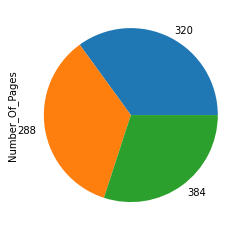

In [31]:
#páginas

freq = df_livros["Number_Of_Pages"].value_counts()
freq = freq.head(3)
freq.plot.pie()


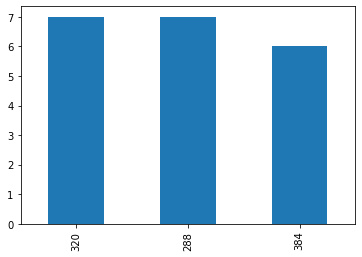

In [32]:
freq.plot.bar()

**Recapitulando algumas funcionalidades:**

In [36]:
df_livros.head()


,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000
2,0,Responsive Web Design Overview For Beginners,50,11.267647
3,1658,Ghost in the Wires: My Adventures as the World...,393,12.873529
4,1325,How Google Works,305,13.164706


In [37]:
df_livros.columns

Index(['Reviews', 'Book_title', 'Number_Of_Pages', 'Price'], dtype='object')

In [38]:
df_livros.count()

Reviews            271
Book_title         271
Number_Of_Pages    271
Price              271
dtype: int64

In [39]:
df_livros.describe()

,Reviews,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000
mean,185.557196,475.077491,54.541860
std,552.122252,306.147492,35.711485
min,0.000000,50.000000,9.323529
25%,5.500000,289.000000,30.751471
50%,35.000000,384.000000,46.317647
75%,116.500000,572.500000,67.854412
max,5938.000000,3168.000000,235.650000


In [43]:
#o método .value_counts() agrupa as linhas e conta as ocorrências do valor.

pd.value_counts(df_livros["Price"]).head(12)

51.473529     5
60.682353     4
91.047059     3
58.944118     2
77.052941     2
36.700000     2
69.379412     2
59.082353     2
220.385294    2
42.276471     2
51.176471     2
44.364706     2
Name: Price, dtype: int64

In [47]:
df_livros.loc[(df_livros["Price"] > 50) & (df_livros["Price"] < 52)]

#tabela abaixo é a prova que consta 5 ocorrências do preço 51.473529

,Reviews,Book_title,Number_Of_Pages,Price
146,171,Practical Object Oriented Design in Ruby,247,50.094118
147,4,The Boost C++ Libraries,570,50.511765
148,0,Building an FPS Game with Unity,326,50.726471
149,1,The It Handbook for Business: Managing Informa...,180,51.176471
150,27,"DIV, Grad, Curl, and All That: An Informal Tex...",176,51.176471
151,1,Design and Validation of Computer Protocols,512,51.361765
152,52,The Psychology of Computer Programming,292,51.432353
153,63,Make Your Own Neural Network,252,51.464706
154,35,Accelerated C++: Practical Programming by Example,352,51.473529
155,11,The Rails Way,851,51.473529


In [ ]:
#parte 1 =ok